# Постановка задачи классификации

**Классификация** — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

## Формальная постановка

Пусть $X$ — множество описаний объектов, 
$Y$ — конечное множество номеров (имён, меток) классов. 
Существует неизвестная *целевая зависимость* — отображение
$y^{*}:\; X\to Y$,
значения которой известны только на объектах конечной обучающей выборки
$X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$.
Требуется построить алгоритм $a:\; X\to Y$,
способный классифицировать произвольный объект
$x \in X$. 

## Типы признаков

* **бинарный**: $D_j$ = $\{0, 1\}$;
* вещественный: $D_j$ из $\{R\}$;
* **категориальный**: $D_j$ -- конечное неупорядоченное множество;
* **порядковый**: $D_j$ --  конечное упорядоченное множество;
* ***множествозначный***: $D_j$ -- подмножество некоторого множества.

В качестве целевого признака в задаче классификации обычно выступают: бинарный, категориальный, порядковый

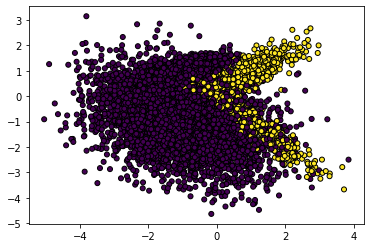

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X_binary, y_binary = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.9, 0.1], flip_y=0, random_state=42)

plt.scatter(X_binary[:, 0], X_binary[:, 1], marker="o", c=y_binary, s=25, edgecolor="k")
plt.show()

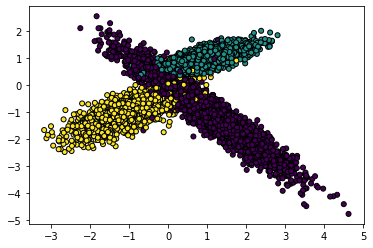

In [ ]:
X_multi, y_multi = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, weights=[0.4, 0.4, 0.2], n_classes=3, random_state=42)

plt.scatter(X_multi[:, 0], X_multi[:, 1], marker="o", c=y_multi, s=25, edgecolor="k")
plt.show()

# Гипотеза компактности

Метрические классификаторы опираются на гипотезу компактности, которая предполагает, что схожие объекты чаще лежат в одном классе, чем в разных. Это означает, что граница между классами имеет достаточно простую форму, и классы образуют компактно локализованные области в пространстве объектов. 

# Метод k-ближайших соседей
kNN, k-nearest neighbors

Простейший метрический классификатор, основанный на оценивании сходства объектов. Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

Варианты:

$n$ -- количество классов, $k$ -- количество соседей
* Метод ближайшего соседа: $n$ -- любое, $k=1$. Классифицируемый объект относится к тому классу, которому принадлежит ближайший объект обучающей выборки.
* Метод k ближайших соседей: $n$ -- любое, $k$ -- любое. При $n=2$ берут нечётное количество соседей, чтобы не возникало ситуаций неоднозначности.
* Метод взвешенных ближайших соседей: $n$ -- любое, $k$ -- любое. При $n \geq 3$ может возникать неоднозначность. Тогда $i$-му соседу приписывается вес $w_i$, как правило, убывающий с ростом ранга соседа $i$. Объект относится к тому классу, который набирает больший суммарный вес среди $k$ ближайших соседей.


## Обучение (fit)
В самом простом варианте стадии обучения как таковой нет. Она заключается в сохранении обучающей выборки внутри модели.
Если выборка очень большая, то на стадии обучения проблему решают двумя способами:
* прореживание
* построение k-d-дерева

## Предсказание (predict)
Состоит из следующих этапов:
1. На основе функции расстояния (метрики) осортировать объекты по удалённости от классифицируемого;
2. Выбрать $k$ ближайших объектов из отсортированной обучающей выборки;
3. Оценить принадлежность по этим $k$ объектам.

In [ ]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # метрику влепить
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.predict([[-3, -3]])

array([0])

In [ ]:
knn.predict([[3, 3]])

array([1])

In [ ]:
y_bin_knn_pred = knn.predict(X_test)

# Метрики качества



## Accuracy

accuracy = (количество верно классифицированных объектов) / (общее количество объектов)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_bin_knn_pred)

0.9521212121212121

## Confusion matrix

![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_2.png)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_bin_knn_pred)

array([[2906,   73],
       [  85,  236]])

## Precision, Recall, F-мера

* $P$ – число истинных результатов, $P = TP + FN$
* $N$ – число ложных результатов, $N = TN + FP.$


![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report


print(classification_report(y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2979
           1       0.76      0.74      0.75       321

    accuracy                           0.95      3300
   macro avg       0.87      0.86      0.86      3300
weighted avg       0.95      0.95      0.95      3300



## ROC AUC score

Полное название ROC — Receiver Operating Characteristic (рабочая характеристика приёмника). Впервые она была создана для использования радиолокационного обнаружения сигналов во время Второй мировой войны. США использовали ROC для повышения точности обнаружения японских самолетов с помощью радара. Поэтому ее называют рабочей характеристикой приемника.

AUC или area under curve — это просто площадь под кривой ROC. 

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.

$TPR = \frac{TP}{TP + FN}$

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.

$FPR = \frac{FP}{TP + FN}$

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


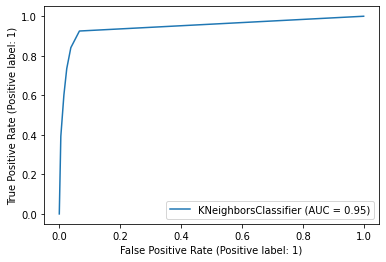

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve


plot_roc_curve(knn, X_test, y_test)

# Байесовский классификатор




## Формула Байеса

Формула Байеса позволяет «переставить причину и следствие»: по известному факту события вычислить вероятность того, что оно было вызвано данной причиной. События, отражающие действие «причин», в данном случае называют гипотезами, так как они — предполагаемые события, повлекшие данное.

$P(A|B) =\frac{P(A) \cdot P(B | A)}{P(B)}$ (1)

* $P(A)$  -- априорная вероятность гипотезы A;
* $P(A|B)$ --  вероятность гипотезы A при наступлении события B (апостериорная вероятность);
* $P(B|A)$ --  вероятность наступления события B при истинности гипотезы A;
* $P(B)$ -- полная вероятность наступления события B.

## Случай с одним признаком

Для классифкации на основе одного признака формулу (1) мы можем переписать следующим образом (2):

$P(class|feature) =\frac{P(class) \cdot P(feature | class)}{P(feature)}$ (2)

Различие между теоремой Байеса и наивным классификатором Байеса состоит в том, что наивный классификатор предполагает условную независимость, тогда как теорема Байеса ее не предполагает. Это означает, что между всеми входными свойствами классификатора нет взаимозависимости. 

Возможно это не очень удачное предположение, но именно поэтому этот алгоритм называют «наивным» (naive). В этом также одна из причин ускоренной работы алгоритма. Несмотря на то, что алгоритм «наивен», он все же может превзойти сложные модели. Поэтому не позволяйте названию вводить вас в заблуждение. 

## Случай с несколькими дискретными признаками


В теореме Байеса вы должны вычислить единую условную вероятность с учетом всех свойств (вверху). С помощью наивного классификатора Байеса мы все упрощаем, вычисляя для каждого свойства условную вероятность, а затем перемножая их. Именно поэтому он и называется «наивным», поскольку условные вероятности всех свойств вычисляются независимо друг от друга.

Теорема Байеса:

$P(class | x_1, x_2, \dots, x_n) = \frac{P(x_1, x_2, \dots, x_n | class) \cdot P(class)}{P(x_1, x_2, \dots, x_n)}$ (5)

Naive Bayes:

$P(class | x_1, x_2, \dots, x_n) = P(x_1|class) \cdot P(x_2|class) \cdot ... \cdot P(x_n|class) \cdot P(class)$ (6)

## Случай с числовыми признаками

Перед построением частотных таблиц числовые переменные можно преобразовать в их категориальные аналоги (разбиение). Другой вариант -- использовать распределение числовой переменной, чтобы иметь представление о её частоте. Например, одна из распространенных практик - предполагать нормальные распределения для числовых переменных.
 
Функция плотности вероятности для нормального распределения определяется двумя параметрами (средним значением и стандартным отклонением).

$\mu = \frac{1}{n}\sum\limits_{i=1}^{n} x_i$ -- среднее

$\sigma = \left[ \frac{1}{n-1} \sum\limits_{i=1}^{n} (x_i - \mu)^2 \right]^{0.5}$ -- стандартное отклонение

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{(x-\mu)^2}{2\sigma^2})}$ -- функция плотности для нормального распределения



Примеры:

https://colab.research.google.com/drive/1wLCswiaoRUWzNzqM9_Gervhmb4jO66nx?usp=sharing

https://colab.research.google.com/drive/1z-3xoT6BzKmmZyycYPpA9EEoJgUlBb2t?usp=sharing

In [ ]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2979
           1       0.67      0.59      0.63       321

    accuracy                           0.93      3300
   macro avg       0.81      0.78      0.79      3300
weighted avg       0.93      0.93      0.93      3300



# Логистическая регрессия

В отличие от обычной регрессии, в методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу. 

[Инфо 1](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F#:~:text=%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%20(Logistic%20regression)%20%E2%80%94,%D0%B0%D0%BF%D0%BE%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%BE%D1%80%D0%BD%D1%8B%D0%B5%20%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B8%D0%BD%D0%B0%D0%B4%D0%BB%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B0%D0%BC.)

[Инфо 2](https://habr.com/ru/company/io/blog/265007/)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2979
           1       0.77      0.59      0.67       321

    accuracy                           0.94      3300
   macro avg       0.86      0.79      0.82      3300
weighted avg       0.94      0.94      0.94      3300



# SVM
support vector machine, машина опорных векторов

Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, создающая наибольшее расстояние до двух параллельных гиперплоскостей. Алгоритм основан на допущении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.

[инфо 1](http://www.machinelearning.ru/wiki/index.php?title=SVM)

[инфо 2](https://habr.com/ru/company/ods/blog/484148/)

In [ ]:
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2979
           1       0.76      0.80      0.78       321

    accuracy                           0.96      3300
   macro avg       0.87      0.89      0.88      3300
weighted avg       0.96      0.96      0.96      3300



# Работа с дисбалансом классов (imbalanced-learn)

* Down sampling -- удаляем объекты мажоритарного класса
* Upper sampling -- добавляем объекты миноритарного класса (дублирование, SMOTE)

# Масштабирование значений признаков 
* Standart Scaller: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* MinMaxScaller: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html



# Задания



## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [ ]:
# ваше решение

## Задание 2

- загрузите датасет для регрессии, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- Масштабируйте числовые признаки
- В случае дисбаланса проведите балансировку
- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


In [ ]:
# ваше решение

## Задание 3
* Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1
* Самостоятельно реализуйте kNN и Naive Bayes

In [ ]:
# ваше решение

## Дополнительные баллы

* Самостоятельно реализуйте SVM с возможностью выбирать ядро.

In [ ]:
# ваше решение